### Lesson 4: Clutter, CFAR, AoA, and Clustering

#### 1D Constant False Alarm Rate Exercise

In [1]:
! pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [1]:
import numpy as np 
import matplotlib.pyplot as plt

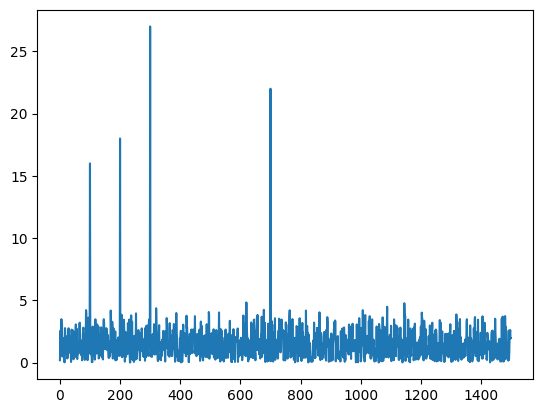

In [4]:
Fs = 1000  # sampling frequency
T = 1 / Fs  # sampling period
L = 1500  # length of signal (1500 ms)
t = np.arange(0, L) * T  # time vector

# Form a signal containing a 77 Hz sinusoid of amplitude 0.7 
# and a 43Hz sinusoid of amplitude 2.
S = 0.7*np.sin(2*np.pi*77*t) + 2*np.sin(2*np.pi*43*t)

# Corrupt the signal with noise
X = S + np.random.normal(0,1,len(S))

#plt.plot(S)
#plt.plot(X)

X_cfar = abs(X)

# Simulating Targets location. 
# Assigning bin 100, 200, 300, and 700 as Targets
# with the amplitudes of 16, 18, 27, 22.
X_cfar[[100, 200, 300, 700]] = [16, 18, 27, 22]

plt.plot(X_cfar)

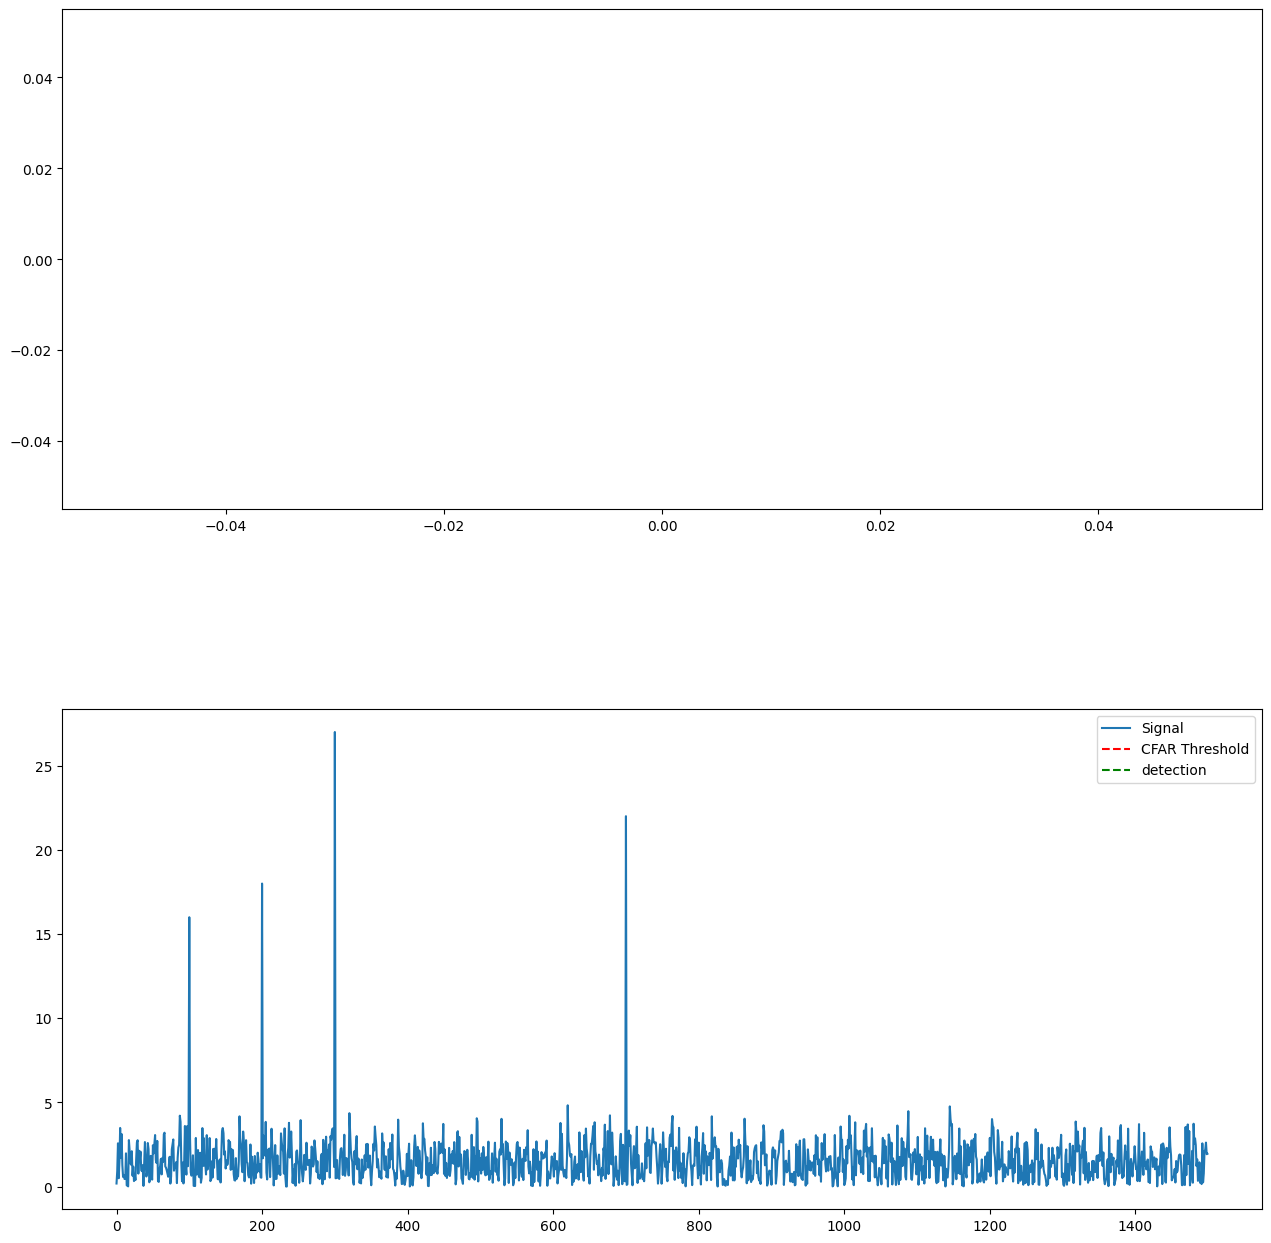

In [6]:
# number of training cells
T = 8
# number of guard cells
G = 2
# number of data points (same as length of signal, L)
Ns = 1500
# offset (adding room above noise threshold for desired SNR)
offset = 4
# initialize an empty list to hold threshold values
threshold_cfar = []
# initiaize an empty list to hold signal after thresholding
signal_cfar = []

# slide window across the signal length
for i in range(Ns-(G+T+1)):
    # TODO: Determine the noise threshold by measuring 
    # it within the training cells
    noise_level = None
    # TODO: scale the noise_level by appropriate offset value and take
    # average over T training cells
    threshold = None
    # Add threshold value to the threshold_cfar vector
    threshold_cfar.append(threshold)
    # TODO: Measure the signal within the CUT
    signal = None
    # add signal value to the signal_cfar vector
    signal_cfar.append(signal)

fig, axs = plt.subplots(2, figsize=(15,15))

plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4) 

axs[0].plot(signal_cfar)

axs[1].plot(X_cfar)
plt.plot(np.roll(threshold_cfar, G), 'r--')
plt.plot(np.roll(signal_cfar, (T+G)), 'g--')
plt.legend(['Signal', 'CFAR Threshold', 'detection'])
plt.savefig("1D_CFAR", dpi=300)